<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER2%20%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C%20%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

개인 학습용으로 정리합니다. 생략한 내용이 많으므로 서적을 직접 참고하시기 바랍니다.

# **2. 붓꽃 품종 예측**

먼저 간단하게 머신러닝을 만들어 보겠습니다. 붓꽃 데이터를 확인하겠습니다.

In [367]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_label = iris.target
print('iris target값:\n', iris_label)
print('iris target명:', iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


훈련 세트와 테스트 세트로 나누겠습니다.

In [368]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data, iris_label, test_size=0.2, random_state=11)

`DecisionTreeClassifier` 클래스의 인스턴스를 선언하고 데이터를 학습시키겠습니다.

In [369]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

예측값과 예측 정확도를 확인하겠습니다.

In [370]:
pred = dt_clf.predict(X_test)
print('예측값: {}'.format(pred))
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측값: [2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
예측 정확도: 0.9333


# **3. 사이킷런 기반 프레임워크**

`iris` 데이터셋은 파이썬 딕셔너리 자료형과 유사한 `Bunch` 클래스입니다. 사이킷런이 가진 다른 예제 데이터셋들도 `Bunch` 클래스입니다. 

In [371]:
iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


딕셔너리 형태처럼 `key`가 존재합니다. `key` 값을 확인해보겠습니다.

In [372]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키:', keys)

붓꽃 데이터 세트의 키: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


`key`가 가진 내용을 확인하겠습니다.

In [373]:
print('feature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)
print()

print('target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', iris_data.target_names.shape)
print(iris_data.target_names)
print()

print('data의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data.data[:5])
print()

print('target의 type:', type(iris_data.target))
print('target의 shape:', iris_data.target.shape)
print(iris_data.target)

feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: (3,)
['setosa' 'versicolor' 'virginica']

data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

target의 type: <class 'numpy.ndarray'>
target의 shape: (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


이처럼 사이킷런이 가진 모든 예제 데이터셋은 보통 위와 같은 `key`로 구성되어 있습니다.

# **4. Model Selection 모듈 소개**

## **4.1. train_test_split() - 학습/테스트 데이터 세트 분리**

붓꽃 데이터를 토대로 붓꽃 품종을 예측하는 모델을 만들어보겠습니다. 위 파트에서는 테스트 세트를 20%로 지정했습니다. 이번에는 30%로 지정하겠습니다. 

In [374]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=0.3, random_state=121)

In [375]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


## **4.2. 교차 검증**

머신러닝은 데이터에 기반합니다. 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 머신러닝에 영향을 주는 요소를 가집니다. 머신러닝 알고리즘이 최적으로 작동할 수 있도록 데이터를 선별하여 학습하면 실제 데이터 양식과는 많은 차이가 발생하고 성능 저하로 이어집니다. 고정된 학습 데이터와 테스트 데이터로 평가하면 모델이 테스트 데이터에 편향되어 다른 데이터에 대해 성능이 떨어질 수 있습니다. 이를 극복하기 위한 솔루션은 교차 검증입니다. 학습 세트를 학습 세트와 검증 세트로 나눠서 학습과 검증 평가를 반복하여 수행하고 마지막에 딱 한 번 테스트 세트로 최종 평가를 수행하는 것입니다.

### **4.2.1. K 폴드 교차 검증**

K 폴드 교차 검증은 가장 보편적으로 사용됩니다. K개의 데이터 폴드 세트를 만들고, 각 폴드 세트를 사용하여 K번만큼 학습과 검증 평가를 반복적으로 수행합니다. 각 폴드에 속해있는 학습 세트와 검증 세트는 구성된 데이터가 모두 다릅니다. 이렇게 각자 다른 데이터로 구성된 폴드 세트를 사용하여 학습과 검증을 반복하면 K개만큼 각각 다른 평가 점수가 도출됩니다. 이렇게 도출된 평가 점수 K개를 평균하면 최종 평가 점수가 도출됩니다.

먼저 붓꽃 데이터를 준비하겠습니다.

In [376]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

print('붓꽃 데이터 세트 크기:', features.shape)

붓꽃 데이터 세트 크기: (150, 4)


`KFold` 클래스로 인스턴스를 생성하고 `split()` 메서드를 호출하여 붓꽃 데이터를 나누겠습니다. 참고로 `split()` 메서드를 호출하면 폴드별 학습용, 검증용 데이터로 나눌 수 있는 행 인덱스를 반환합니다. 코드로써 전체 내용을 구현하겠습니다.

In [377]:
# 폴드 세트 5개로 분리하는 KFold 인스턴스를 생성합니다.
kfold = KFold(n_splits=5)
# 폴드 세트별 정확도를 담을 리스트 객체를 생성합니다.
cv_accuracy = []
# 반복 횟수는 0으로 지정합니다.
n_iter = 0

for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('* {}번째 교차 검증 정확도: {}, 학습 데이터 크기: {}, 검증 데이터 크기: {}'.
          format(n_iter, accuracy, train_size, test_size))
    print('* {}번째 검증 세트 인덱스: {}'.
          format(n_iter, test_index))
    print()
    cv_accuracy.append(accuracy)

print('-> 평균 검증 정확도:', np.mean(cv_accuracy))

* 1번째 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
* 1번째 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

* 2번째 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
* 2번째 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

* 3번째 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
* 3번째 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

* 4번째 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
* 4번째 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

* 5번째 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
* 5번째 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

-> 평균 검증 정확도: 0.9


### **4.2.2. Stratified K 폴드**

Stratified K 폴드는 불균형한 분포도를 가진 레이블 데이터 집합을 위한 기법입니다. 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이할 정도로 많거나 적어서 값 분포가 한쪽으로 치우친 것을 의미합니다.

Stratified K 폴드는 K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 세트와 테스트 세트에 제대로 분배하도록 합니다. 원본 데이터의 레이블 분포를 먼저 고려하고, 이 분포와 동일하게 학습 데이터와 검증 데이터 세트를 분배합니다.

K 폴드에 어떤 문제가 있는지 확인하고 `StratifiedKFlod` 클래스로 문제를 개선해보겠습니다. 일단 붓꽃 데이터를 데이터프레임으로 생성하고 레이블 값의 분포도를 확인하겠습니다.

In [378]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

각 레이블마다 동일하게 50개씩입니다. 이슈를 발생시키기 위해 폴드 세트 3개를 `KFold` 클래스로 생성하고 각 교차 검증마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인하겠습니다.

In [379]:
kfold = KFold(n_splits=3)
n_iter=0

for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('* 교차 검증 {}번째'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print()

* 교차 검증 1번째
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64

* 교차 검증 2번째
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64

* 교차 검증 3번째
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64



각 레이블마다 50개씩 포함되어 있으므로 특정 레이블은 학습하지 못하는 교차 검증이 발생합니다. 

이제 `StratifiedKFlod` 클래스를 사용해보겠습니다. `KFold` 클래스와 사용법은 비슷하지만 차이가 하나 있습니다. `split()` 메서드에 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 함께 지정해야 합니다. 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문입니다.

In [380]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

# 레이블 데이터 세트도 함께 지정합니다.
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('* 교차 검증 {}번째'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print()

* 교차 검증 1번째
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64

* 교차 검증 2번째
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64

* 교차 검증 3번째
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64



`StratifiedKFlod` 클래스를 사용하여 데이터를 분리하고 교차 검증별 정확도와 평균 검증 정확도를 도출해보겠습니다.

In [381]:
dt_clf = DecisionTreeClassifier(random_state=156)
skf = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skf.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('* {}번째 교차 검증 정확도: {}, 학습 데이터 크기: {}, 검증 데이터 크기: {}'.
          format(n_iter, accuracy, train_size, test_size))
    print('* {}번째 검증 세트 인덱스: {}'.
          format(n_iter, test_index))
    print()
    cv_accuracy.append(accuracy)

print('-> 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('-> 평균 검증 정확도:', np.mean(cv_accuracy))

* 1번째 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
* 1번째 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

* 2번째 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
* 2번째 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

* 3번째 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
* 3번째 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

-> 교차 검증별 정확도: [0.98 0.94 0.98]
-> 평균 검증 정확도: 0.9666666666666667


일반적으로 분류 문제에서 교차 검증은 Stratified K 폴드로 분할되어야 합니다. 회귀에서는 Stratified K 폴드가 지원되지 않습니다. 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이므로 결정값별로 분포를 정할 필요가 없습니다. 

### **4.2.3. cross_val_score() - 교차 검증을 보다 간편하게**

`cross_val_score()` 메서드를 사용하여 교차 검증을 더욱 편리하게 수행할 수 있습니다. 위에서는 폴드 세트를 만들고 for 문으로 인덱스를 추출해서 학습과 예측을 반복적으로 수행하고 예측 성능을 확인했습니다. 이 작업을 `cross_val_score()` 메서드를 통해 한꺼번에 수행할 수 있습니다.

In [382]:
from sklearn.model_selection import cross_val_score, cross_validate

# help(cross_val_score)

주요 매개변수는 `estimator`, `X`, `y`, `scoring`, `cv`입니다. `estimator` 매개변수에는 분류 클래스나 회귀 클래스를 지정합니다. `scoring` 매개변수에는 예측 성능 평가 지표를 지정합니다. `cv` 매개변수에는 교차 검증 폴드 수를 지정합니다. 

코드로 구현하면서 살펴보겠습니다.

In [383]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)
data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### **4.2.4. GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**

그리드 서치를 구현한 `GridSearchCV` 클래스를 사용하여 최적 파라미터를 탐색할 수 있습니다.

In [384]:
from sklearn.model_selection import GridSearchCV

# help(GridSearchCV)

`GridSearchCV` 클래스 생성자에 지정할 수 있는 주요 파라미터는 아래와 같습니다.

- `estimator`: classifier, regressor, pipeline을 지정할 수 있습니다.

- `param_grid`: 튜닝에 사용할 파라미터를 지정합니다.

- `scoring`: 예측 성능을 측정할 평가 방법을 지정합니다.

- `cv`: 교차 검증을 위해 분할되는 학습/테스트 세트 개수를 지정합니다.

- `refit`: 최적 하이퍼 파라미터를 찾고 입력된 estimator 객체를 해당 하이퍼 파라미터로 다시 학습할지 여부를 지정합니다. 기본값은 `True`입니다.

`GridSearchCV` 클래스를 사용해보겠습니다. 먼저 학습 세트와 테스트 세트를 나누고 파라미터 탐색에 사용할 파라미터를 딕셔너리로 지정하겠습니다.

In [385]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2, 3],
              'min_samples_split': [2, 3]
              }

`GridSearchCV` 클래스의 인스턴스로 `grid_dtree`를 정의하고, `fit()` 메서드에 학습 세트를 인자로 지정하여 호출하겠습니다. `cv_results_` 속성에 학습과 평가를 수행한 결과가 기록됩니다.

In [386]:
grid_dtree = GridSearchCV(dtree, param_grid=param_grid, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

`cv_results_` 속성을 데이터프레임으로 출력해보겠습니다.

In [387]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


최적 파라미터와 최고 정확도를 확인하겠습니다.

In [388]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


`GridSearchCV` 클래스에 `refit=True`(기본값)으로 매개변수를 지정했으므로 최적 성능을 내는 하이퍼 파라미터로 Estimator를 학습하여 `best_estimator_` 속성에 저장합니다. 이 속성을 객체로 만들어서 `predict()` 메서드를 호출하면 테스트 세트에 대한 성능을 확인할 수 있습니다.

In [389]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 세트 정확도: 0.9667


# **5. 데이터 전처리**

결측치가 대부분인 피처는 다른 값으로 대체하지 않고 통으로 제거하는 편이 좋습니다. 다만 결측치가 일정 수준 이상인지 판단할 수 있는 명확한 기준은 존재하지 않기 때문에 예측 왜곡이 심해지지 않도록 합리적인 방안을 모색해야 할 것입니다.

문자열 피처는 카테고리형과 텍스트형으로 나뉩니다. 카테고리형 피처는 코드 값으로 표현하는 게 좋습니다. 텍스트형 피처는 피처 벡터화 등의 기법으로 벡터화하거나 불필요한 피처(예컨대 주민번호, 문자열 아이디 등)라면 삭제하는 게 좋습니다. 이런 식별자 피처는 행을 식별하는 용도이므로 알고리즘을 복잡하게 만들고 예측 성능을 떨어뜨리기 때문입니다.

## **5.1. 데이터 인코딩**

대표적인 인코딩 방법은 레이블 인코딩(label encoding)과 원-핫 인코딩(one-hot encoding)입니다.

### **5.1.1. 레이블 인코딩**

레이블 인코딩은 카테고리 피처를 코드형 숫자로 변환하는 방법입니다. `LabelEncoder` 클래스에 구현되어 있습니다.

레이블 인코딩을 수행해보겠습니다.

In [390]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('인코딩 변환값:', labels)
print('인코딩 클래스:', encoder.classes_)

인코딩 변환값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


해당하는 클래스로 디코딩해보겠습니다.

In [391]:
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블이 숫자로 변환되었으므로 머신러닝 알고리즘의 종류에 따라서는 예측 성능이 떨어질 수 있습니다. 숫자는 크고 작은 특성을 가집니다. 1과 2의 경우 값이 큰 2에 가중치가 더 부여될 수도 있습니다. 때문에 레이블 인코딩은 선형 회귀 같은 알고리즘에는 적합하지 않습니다. 숫자 특성을 반영하지 않는 트리 알고리즘에는 적합합니다.

이러한 레이블 인코딩의 문제점을 해결하는 인코딩 방식은 원-핫 인코딩입니다. 

### **5.1.2. 원-핫 인코딩**

원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가하여 고윳값에 해당하는 열에만 1을 표시하고 나머지 칼럼에는 0을 표시합니다. `OneHotEncoder` 클래스에 원-핫 인코딩이 구현되어 있습니다. 이 클래스로 변환하기 전에 먼저 모든 문자열 값을 숫자형으로 변환해야 합니다. 아울러 입력 값으로는 2차원 데이터가 필요합니다.

코드로 구현해보겠습니다.

In [392]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 숫자형으로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1, 1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


판다스의 `get_dummies()` 메서드를 사용하여 원-핫 인코딩을 더 쉽게 수행할 수 있습니다.

In [393]:
import pandas as pd

df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## **5.2. 피처 스케일링과 정규화**

피처 스케일링(feature scaling)은 서로 다른 변수의 값 범위를 일정 수준으로 맞추는 작업입니다. 피처 스케일링에는 표준화(standardization)와 정규화(normalization)가 있습니다.

표준화는 데이터의 각 피처가 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것입니다. 공식은 아래와 같습니다.

$$x_i\_new = \frac{x_i-mean(x)}{stdev(x)}$$

표준화를 통해 변환될 피처 $x$의 새로운 $i$번째 데이터를 $x_i\_new$라고 한다면 이 값은 원래 값에서 피처 $x$의 평균을 뺀 값을 피처 $x$의 표준편차로 나눈 값입니다.

정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환하는 것입니다. 0 ~ 100인 피처 A와 0 ~ 100,000인 피처 B를 모두 동일한 크기인 0 ~ 1로 변환할 수 있습니다. 개별 데이터 크기를 같은 단위로 바꾸는 것입니다. 공식은 아래와 같습니다.

$$x_i\_new = \frac{x_i-min(x)}{max(x)-min(x)}$$

원래 값에서 피처 $x$의 최솟값을 뺀 값을 피처 $x$의 최댓값과 최솟값의 차이로 나눈 값입니다.

다만 사이킷런의 전처리에서 제공하는 `Normalizer` 모듈과 일반적인 정규화는 차이가 있습니다. `Normalizer` 모듈은 선형대수에서의 정규화 개념이 적용되었으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미합니다. 개별 벡터를 모든 피처 벡터의 크기로 나누는 것입니다. 피처 3개인 $x$, $y$, $z$가 있다면 새 데이터 $x_i\_new$는 원래 값에서 피처 3개의 $i$번째 피처 값에 해당하는 크기를 합한 값으로 나눕니다. 공식은 아래와 같습니다.

$$x_i\_new = \frac{x_i}{\sqrt{x^2_i + y^2_i + z^2_i}}$$

### **5.2.1. StandardScaler**


`StandardScaler` 클래스에는 표준화가 구현되어 있습니다. 개별 피처를 평균이 0이고 분산이 1인 값으로 변환시킵니다. 가우시안 정규 분포를 갖도록 하는 것입니다. `RBF` 커널을 이용하는 서포트 벡터 머신(support vector machine), 선형 회귀(linear regression), 로지스틱 회귀(logistic regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되어 있으므로 표준화 작업을 선행하면 예측 성능을 향상시키는 데 큰 도움이 됩니다.

`StandardScaler` 클래스가 어떻게 데이터 값을 변환하는 것을 확인하겠습니다. 먼저 기존 데이터 값의 평균값과 분산값을 확인하겠습니다.

In [394]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print('feature들의 평균값')
print(iris_df.mean())
print()
print('feaure들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feaure들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


이제 각 피처를 표준화하고 난 후의 평균값과 분산값을 확인하겠습니다. 

In [395]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 평균값')
print(iris_df_scaled.mean())
print()
print('feaure들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feaure들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


평균은 0에 가까운 값, 분산은 1에 가까운 값으로 변환되었습니다.

### **5.2.2. MinMaxScaler**

`MinMaxScaler` 클래스는 데이터값을 0 ~ 1 사이로 변환합니다. 만약 음수값이라면 -1 ~ 1로 변환합니다. 데이터 분포가 가우시안 분포가 아닐 때 시도해볼 만합니다.

`MinMaxScaler` 클래스를 코드로 구현해보겠습니다.

In [396]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최솟값')
print(iris_df_scaled.min())
print()
print('feaure들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feaure들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### **5.2.3. 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**

데이터 스케일링 변환 시 `fit()` 메서드로는 데이터 변환을 위한 기준 정보를 설정하고, `transform()` 메서드로는 기준 정보를 토대로 데이터를 변환합니다. `fit_transform()` 메서드는 두 메서드를 하나로 통합한 것입니다.

다만 주의해야 할 점이 있습니다. 학습 데이터로 `fit()` 메서드를 적용한 스케일링 기준 정보를 토대로 테스트 세트에 적용해야 한다는 것입니다. 코드로 구현하면서 설명을 이어가겠습니다. 먼저 임의의 학습 세트와 테스트 세트를 생성합니다.

In [397]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

학습 세트인 `train_array` 객체를 변환하겠습니다. 0 ~ 10까지 값을 가지는데 `MinMaxScaler` 클래스의 `fit()` 메서드를 적용하면 최솟값은 0, 최댓값은 10이 되며 1/10 scale이 적용됩니다. 여기에 `transform()` 메서드를 적용하면 1/10 scale로 학습 데이터를 변환하게 되어 원본 데이터 1은 0.1, 2는 0.2, 10은 1이 됩니다.

In [398]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


이제 테스트 세트인 `test_array`를 변환하겠습니다. 0 ~ 5까지 값을 가지는데 `MinMaxScaler` 클래스의 `fit()` 메서드를 적용하면 최솟값은 0, 최댓값은 5이 되며 1/5 scale이 적용됩니다. 여기에 `transform()` 메서드를 적용하면 1/5 scale로 학습 데이터를 변환하게 되어 원본 데이터 1은 0.2, 2는 0.4, 5는 1이 됩니다.

In [399]:
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


학습 데이터와 테스트 데이터의 스케일링이 맞지 않습니다. 테스트 데이터에 다시 `fit()` 메서드를 적용해서 발생한 결과입니다. 따라서 학습 데이터로 `fit()` 메서드를 적용하여 생성된 `scaler` 객체만을 사용하여 `transform()` 메서드로 변환해야 합니다. 같은 논리로 `fit_transform()` 메서드는 학습 데이터에만 사용하고 테스트 데이터에는 사용하지 않아야 합니다. 이를 코드로 구현해보겠습니다.

In [400]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))
print()

test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


In [401]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))
print()

test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


# **6. 타이타닉 생존자 예측**

타이타닉 탑승자 데이터를 기반으로 생존자를 예측해보겠습니다.

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


데이터를 데이터프레임으로 가져오겠습니다.

In [403]:
titanic_df = pd.read_csv('/content/gdrive/MyDrive/titanic/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터 정보를 확인하겠습니다.

In [404]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


결측치를 채우겠습니다.

In [405]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

결측치 개수를 확인해보겠습니다.

In [406]:
print('데이터 세트 Null 값 여부:\n', titanic_df.isnull())
print()
print('데이터 세트 열별 Null 값 개수:')
print(titanic_df.isnull().sum())
print()
print('데이터 세트 Null 값 총 개수:', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 여부:
      PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False  False     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False  False     False
3          False     False   False  False  ...   False  False  False     False
4          False     False   False  False  ...   False  False  False     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False  False     False
887        False     False   False  False  ...   False  False  False     False
888        False     False   False  False  ...   False  False  False     False
889        False     False   False  False  ...   False  False  False     False
890        False     False   False  False  ...   False  False  False     False

[891 rows x 12 columns]

데이터 세트 

문자열 피처 3개가 가진 값 분류를 확인해보겠습니다.

In [407]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print()
print('Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print()
print('Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


다른 피처들은 문제가 없으나 'Cabin' 피처는 'N'만 687개이고 나머지도 숫자가 붙어서 종류가 많습니다. 선실 번호의 첫 글자 알파벳이 선실 등급을 나타내므로 앞에 붙은 숫자는 큰 의미가 없습니다. 숫자를 지우고 첫 글자 알파벳만 남기겠습니다.

In [408]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())
print()
print(titanic_df['Cabin'].value_counts())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


성별과 생존의 연관성을 확인해보겠습니다. 'Sex' 열과 'Survived' 열을 그룹화하고, 'Survived' 열의 값 개수를 출력하겠습니다.

In [409]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

가로 막대 차트로 시각화해보겠습니다.

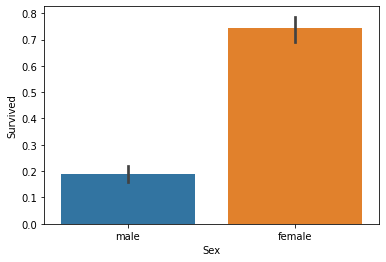

In [410]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()

여성의 생존 비율(확률)이 더 높습니다. 

객실 등급과 성별을 함께 가로 막대 차트로 시각화해보겠습니다.

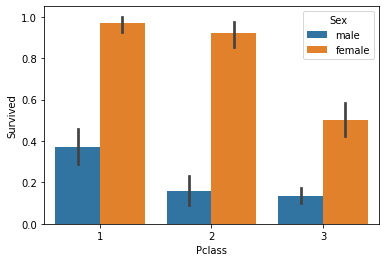

In [411]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

객실 등급이 높을수록 생존 비율이 더 높습니다.

이번에는 나이에 따른 생존 비율을 확인하겠습니다. 'Age' 열의 값 종류가 많으므로 범위에 따라 분류하는 함수를 선언하겠습니다.

In [412]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

나이에 따른 생존 비율을 가로 막대 차트로 시각화하겠습니다. 

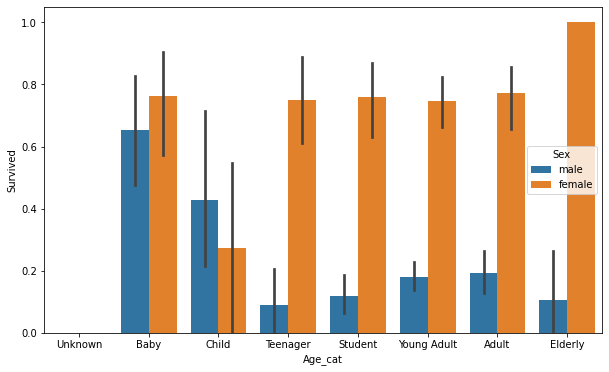

In [413]:
plt.figure(figsize=(10, 6))
# 위에서 생성한 `get_category()` 함수를 'Age' 열에 적용하여 새로운 열을 만듭니다.
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

# 시각화할 순서를 지정하기 위한 객체를 생성합니다.
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult',
               'Adult', 'Elderly']
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

titanic_df.drop('Age_cat', axis=1, inplace=True)

여자 Baby와 여자 Elderly의 생존 비율은 높고, 여자 Child의 오히려 남자 Child의 생존 비율보다 낮습니다. 남자의 경우 전반적으로 여자보다 생존 비율이 낮습니다. 결론적으로 이 세 열('Sex', 'Age', 'PClass')은 생존을 좌우하는 피처라고 볼 수 있습니다.

이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하겠습니다. 레이블 인코딩은 `LabelEncoder` 클래스로 수행하고, `LabelEncoder` 클래스의 인스턴스는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수-1)까지의 숫자 값으로 변환합니다. 함수를 새롭게 선언하여 모든 열이 한 번에 변환되도록 하겠습니다.

In [414]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

In [415]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [416]:
print(titanic_df['Sex'].value_counts())
print()
print(titanic_df['Cabin'].value_counts())
print()
print(titanic_df['Embarked'].value_counts())

1    577
0    314
Name: Sex, dtype: int64

7    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
8      1
Name: Cabin, dtype: int64

3    644
0    168
2     77
1      2
Name: Embarked, dtype: int64


지금까지의 내용을 함수로 생성하여 전처리 과정을 재수행하기 쉽도록 하겠습니다.

In [417]:
# 결측치를 처리하는 함수를 선언합니다.
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 데이터 분석에 불필요한 피처를 제거하는 함수를 선언합니다.
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩을 수행하는 함수를 선언합니다.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 전처리를 위해 생성한 모든 함수를 호출하는 함수를 선언합니다.
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

타이타닉 데이터를 다시 로드하고 'Survived' 피처만 분리하여 클래스 결정값데이터 세트로 생성하겠습니다. 아울러 'Survived' 피처를 드롭하고 새로운 피처 데이터 세트를 생성하겠습니다. 이렇게 생성한 새로운 데이터 세트에 직접 선언한 전처리 함수인 `transform_features()`를 호출하겠습니다.

In [418]:
titanic_df = pd.read_csv('/content/gdrive/MyDrive/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

학습 데이터와 테스트 데이터로 나누겠습니다.

In [419]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, test_size=0.2, random_state=11
    )

결정 트리, 랜덤 포레스트, 로지스틱 회귀를 사용하여 생존자를 예측하겠습니다. 일단 최적화 작업은 수행하지 않겠습니다.

In [433]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


교차 검증으로 결정 트리 모델을 좀 더 평가해보겠습니다. 

In [434]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {} 정확도: {:.4f}'.format(iter_count, accuracy))
    mean_score = np.mean(scores)
    print('평균 정확도: {:.4f}'.format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [436]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {} 정확도: {:.4f}'.format(iter_count, accuracy))
print('평균 정확도: {:.4f}'. format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


`KFold` 클래스와 `cross_val_score()` 메서드의 결과가 다른 이유는 `cross_val_score()` 메서드는 `StratifiedKFold`를 사용하기 때문입니다.



---

휴식 중입니다.

---

